<a href="https://colab.research.google.com/github/Nielia2002/bank-marketing-prediction/blob/main/MLassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [16]:
# Load the dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep=';')

# Display the first few rows of the dataset in a styled table
print("First few rows of the dataset:")
print(tabulate(data.head(), headers='keys', tablefmt='github'))

# Read the metadata file
metadata_path = "/content/bank-additional-names.txt"
with open(metadata_path, 'r') as file:
    column_descriptions = file.read().splitlines()

# Display metadata descriptions
print("\nColumn Descriptions:\n")
for description in column_descriptions:
    print(description)


First few rows of the dataset:
|    |   age | job       | marital   | education   | default   | housing   | loan   | contact   | month   | day_of_week   |   duration |   campaign |   pdays |   previous | poutcome    |   emp.var.rate |   cons.price.idx |   cons.conf.idx |   euribor3m |   nr.employed | y   |
|----|-------|-----------|-----------|-------------|-----------|-----------|--------|-----------|---------|---------------|------------|------------|---------|------------|-------------|----------------|------------------|-----------------|-------------|---------------|-----|
|  0 |    56 | housemaid | married   | basic.4y    | no        | no        | no     | telephone | may     | mon           |        261 |          1 |     999 |          0 | nonexistent |            1.1 |           93.994 |           -36.4 |       4.857 |          5191 | no  |
|  1 |    57 | services  | married   | high.school | unknown   | no        | no     | telephone | may     | mon           |        149 |  

In [17]:
# Explore the dataset,

# Check the first few rows of the dataset(.csv file)  (Already checked)

# Get a summary of the dataset,
print("\nDataset Summary:")
print(data.info())

# Check for missing values (If there any),
print("\nMissing Values:")
print(data.isnull().sum())

# Check for duplicate values (If there any),
print("\nDuplicate Values:")
print(data.duplicated().sum())

# Statistical summary,
print("\nStatistical Summary:")
print(data.describe())



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx

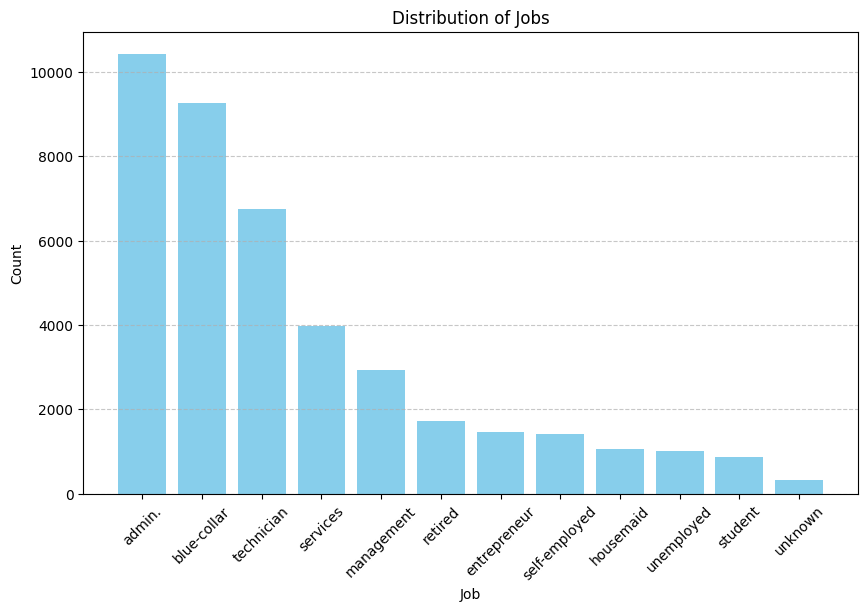

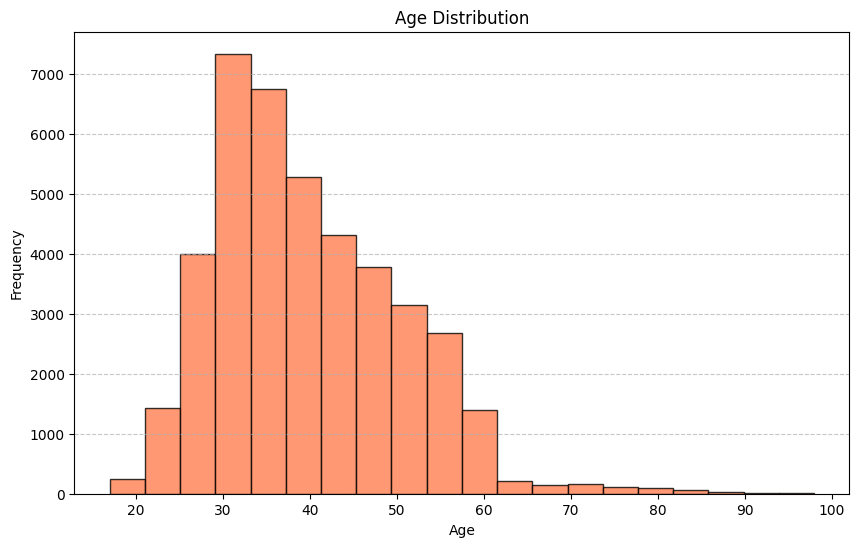

In [19]:
# Load the dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep=';')

# Example: Visualize a categorical column (Job)
job_counts = data['job'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(job_counts.index, job_counts.values, color='skyblue')
plt.title("Distribution of Jobs")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Example: Visualize a numerical column (Age)
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='coral', edgecolor='black', alpha=0.8)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# Load the dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep=';')

# Identify the target variable
print("Target Variable Distribution:")
target_distribution = data['y'].value_counts()
print(target_distribution, "\n")
print("This indicates a Binary Classification problem.")

# List categorical columns
print("\nCategorical Features:")
categorical_features = [col for col in data.columns if data[col].dtype == 'object']
for feature in categorical_features:
    print(f"- {feature}")

# Display unique values of a sample categorical column
print("\nUnique values in the 'job' column:")
print(", ".join(data['job'].unique()))

# List numerical columns
print("\nNumerical Features:")
numerical_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
for feature in numerical_features:
    print(f"- {feature}")

# Check summary statistics for a sample numerical column
print("\nStatistics of the 'age' column:")
age_stats = data['age'].describe()
print(age_stats)


Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64 

This indicates a Binary Classification problem.

Categorical Features:
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- day_of_week
- poutcome
- y

Unique values in the 'job' column:
housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student

Numerical Features:
- age
- duration
- campaign
- pdays
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed

Statistics of the 'age' column:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Load the dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep=';')

# 1. **Check Missing Values**
print("\nChecking for Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)

# 2. **Identify Placeholder Values in Categorical Columns**
print("\nPlaceholder Values ('unknown') in Categorical Columns:")
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")

# 3. **Remove Rows with Placeholder Values ('unknown')**
print("\nRemoving Rows with 'unknown' Values:")
for col in categorical_columns:
    data = data[data[col] != 'unknown']

# Verify Removal
print("\nUnique Values in Categorical Columns After Removal:")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

# 4. **Encode Categorical Variables**
# Random Forest: Label Encoding
print("\nApplying Label Encoding for Random Forest:")
data_rf = data.copy()
label_encoder = LabelEncoder()

for col in categorical_columns:
    data_rf[col] = label_encoder.fit_transform(data_rf[col])

print("\nLabel Encoded Dataset (Random Forest):")
print(data_rf.head())

# Neural Network: One-Hot Encoding
print("\nApplying One-Hot Encoding for Neural Network:")
data_nn = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("\nOne-Hot Encoded Dataset (Neural Network):")
print(data_nn.head())

# Save Preprocessed Datasets
data_rf.to_csv('data_rf_preprocessed_alternative.csv', index=False)
data_nn.to_csv('data_nn_preprocessed_alternative.csv', index=False)

# 5. **Feature Scaling for Neural Network**
# Identify Numerical Columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

print("\nScaling and Normalizing Numerical Features for NN:")
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply Standard Scaling
data_nn[numerical_columns] = scaler_standard.fit_transform(data_nn[numerical_columns])

# Apply Min-Max Normalization
data_nn[numerical_columns] = scaler_minmax.fit_transform(data_nn[numerical_columns])

# Verify Scaled Data
print("\nScaled Numerical Columns:")
print(data_nn[numerical_columns].head())

# Save Scaled Dataset
data_nn.to_csv('data_nn_scaled_alternative.csv', index=False)



Checking for Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Placeholder Values ('unknown') in Categorical Columns:
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'j

In [23]:
# Recheck the dataset created for RF to ensure the dataset is fully pre-processed,
print(data_rf.info())
# From now onwards use the following datasets ;
      # For Random Forest Model - Use data_rf_preprocessed.csv
      # For Neural Network Model - Use data_nn_scaled.csv





<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  int64  
 2   marital         30488 non-null  int64  
 3   education       30488 non-null  int64  
 4   default         30488 non-null  int64  
 5   housing         30488 non-null  int64  
 6   loan            30488 non-null  int64  
 7   contact         30488 non-null  int64  
 8   month           30488 non-null  int64  
 9   day_of_week     30488 non-null  int64  
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  int64  
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null  floa

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Reload preprocessed datasets
data_rf = pd.read_csv('data_rf_preprocessed_alternative.csv')
data_nn = pd.read_csv('data_nn_scaled_alternative.csv')

# Display column names to confirm the target variable's name
print("\nColumns in NN dataset:", data_nn.columns)

# Define features (X) and target (y) for RF and NN
# Random Forest
X_rf = data_rf.loc[:, data_rf.columns != 'y']  # All columns except 'y'
y_rf = data_rf['y']  # Target

# Neural Network
X_nn = data_nn.loc[:, data_nn.columns != 'y_yes']  # All columns except 'y_yes'
y_nn = data_nn['y_yes']  # Target

# Split datasets into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# Print the shape of training and testing datasets to ensure splitting is correct
print("\nRandom-Forest Dataset:")
print(f"Training set: {X_train_rf.shape}, {y_train_rf.shape}")
print(f"Testing set: {X_test_rf.shape}, {y_test_rf.shape}")

print("\nNeural-Network Dataset:")
print(f"Training set: {X_train_nn.shape}, {y_train_nn.shape}")
print(f"Testing set: {X_test_nn.shape}, {y_test_nn.shape}")

# Check target distribution in training and testing sets
print("\nRF Training set target distribution:\n", y_train_rf.value_counts())
print("RF Testing set target distribution:\n", y_test_rf.value_counts())

print("\nNN Training set target distribution:\n", y_train_nn.value_counts())
print("NN Testing set target distribution:\n", y_test_nn.value_counts())

# Apply SMOTE to balance the training datasets
smote = SMOTE(random_state=42)

# Resample RF training set
X_train_rf_resampled, y_train_rf_resampled = smote.fit_resample(X_train_rf, y_train_rf)
print("\nResampled RF Training set target distribution:\n", y_train_rf_resampled.value_counts())

# Resample NN training set
X_train_nn_resampled, y_train_nn_resampled = smote.fit_resample(X_train_nn, y_train_nn)
print("\nResampled NN Training set target distribution:\n", y_train_nn_resampled.value_counts())

# No need to resample the testing sets as they represent the original data

# Save the resampled datasets for further use (optional)
X_train_rf_resampled.to_csv('X_train_rf_resampled.csv', index=False)
y_train_rf_resampled.to_csv('y_train_rf_resampled.csv', index=False)
X_train_nn_resampled.to_csv('X_train_nn_resampled.csv', index=False)
y_train_nn_resampled.to_csv('y_train_nn_resampled.csv', index=False)



Columns in NN dataset: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

Random-Forest Dataset:
Training set: (24390, 20), 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio


Resampled RF Training set target distribution:
 y
0    21325
1    21325
Name: count, dtype: int64

Resampled NN Training set target distribution:
 y_yes
False    21325
True     21325
Name: count, dtype: int64


In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
)
from imblearn.over_sampling import SMOTE

X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)


# Resample training data with SMOTE (if not already balanced)
smote = SMOTE(random_state=42)
X_train_rf_resampled, Y_train_rf_resampled = smote.fit_resample(
    X_train_rf_resampled, y_train_rf_resampled
)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight(
    "balanced", classes=np.unique(Y_train_rf_resampled), y=Y_train_rf_resampled
)
class_weights_dict = dict(zip(np.unique(Y_train_rf_resampled), class_weights))

# Define the Random Forest classifier with hyperparameter adjustments
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight=class_weights_dict,  # Use computed class weights
    random_state=42,
)

# Train the Random Forest model
rf_classifier.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict probabilities for the test set
y_rf_proba = rf_classifier.predict_proba(X_test_rf)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test_rf, y_rf_proba)

# Calculate F1 score to determine the best threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold for Precision-Recall Tradeoff: {optimal_threshold:.4f}")

# Adjust predictions based on the optimal threshold
y_rf_pred_adjusted = (y_rf_proba >= optimal_threshold).astype(int)

# Predict classes using the default threshold (0.5)
y_rf_pred_default = rf_classifier.predict(X_test_rf)

# Evaluate the model
roc_auc = roc_auc_score(Y_test_rf, y_rf_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")
print(f"\nAccuracy (Default Threshold): {accuracy_score(Y_test_rf, y_rf_pred_default):.4f}")
print(f"\nAccuracy (Adjusted Threshold): {accuracy_score(Y_test_rf, y_rf_pred_adjusted):.4f}")

# Classification Report for default threshold
print("\nClassification Report (Default Threshold):")
print(classification_report(Y_test_rf, y_rf_pred_default))

# Confusion Matrix for default threshold
print("\nConfusion Matrix (Default Threshold):")
print(confusion_matrix(Y_test_rf, y_rf_pred_default))

# Classification Report for adjusted threshold
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(Y_test_rf, y_rf_pred_adjusted))

# Confusion Matrix for adjusted threshold
print("\nConfusion Matrix (Adjusted Threshold):")
print(confusion_matrix(Y_test_rf, y_rf_pred_adjusted))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Optimal Threshold for Precision-Recall Tradeoff: 0.5260

ROC-AUC Score: 0.9360

Accuracy (Default Threshold): 0.8826

Accuracy (Adjusted Threshold): 0.8898

Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      5304
           1       0.53      0.80      0.64       794

    accuracy                           0.88      6098
   macro avg       0.75      0.85      0.79      6098
weighted avg       0.91      0.88      0.89      6098


Confusion Matrix (Default Threshold):
[[4744  560]
 [ 156  638]]

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      5304
           1       0.55      0.78      0.65       794

    accuracy                           0.89      6098
   macro avg       0.76      0.84      0.79      6098
weighted avg       0.91      0.89      0.90      6098


Confusion Matrix (Adjusted Thresho

Epoch 1/15
1067/1067 - 3s - 3ms/step - accuracy: 0.8409 - loss: 0.3616 - val_accuracy: 0.8591 - val_loss: 0.3332
Epoch 2/15
1067/1067 - 2s - 2ms/step - accuracy: 0.8850 - loss: 0.2768 - val_accuracy: 0.9068 - val_loss: 0.2631
Epoch 3/15
1067/1067 - 3s - 2ms/step - accuracy: 0.8937 - loss: 0.2529 - val_accuracy: 0.9059 - val_loss: 0.2691
Epoch 4/15
1067/1067 - 3s - 3ms/step - accuracy: 0.8977 - loss: 0.2399 - val_accuracy: 0.9047 - val_loss: 0.2582
Epoch 5/15
1067/1067 - 3s - 3ms/step - accuracy: 0.9028 - loss: 0.2300 - val_accuracy: 0.9027 - val_loss: 0.2597
Epoch 6/15
1067/1067 - 2s - 2ms/step - accuracy: 0.9058 - loss: 0.2218 - val_accuracy: 0.9013 - val_loss: 0.2623
Epoch 7/15
1067/1067 - 2s - 2ms/step - accuracy: 0.9088 - loss: 0.2143 - val_accuracy: 0.9054 - val_loss: 0.2505
Epoch 8/15
1067/1067 - 3s - 2ms/step - accuracy: 0.9113 - loss: 0.2077 - val_accuracy: 0.9074 - val_loss: 0.2488
Epoch 9/15
1067/1067 - 2s - 2ms/step - accuracy: 0.9144 - loss: 0.2012 - val_accuracy: 0.9123 - 

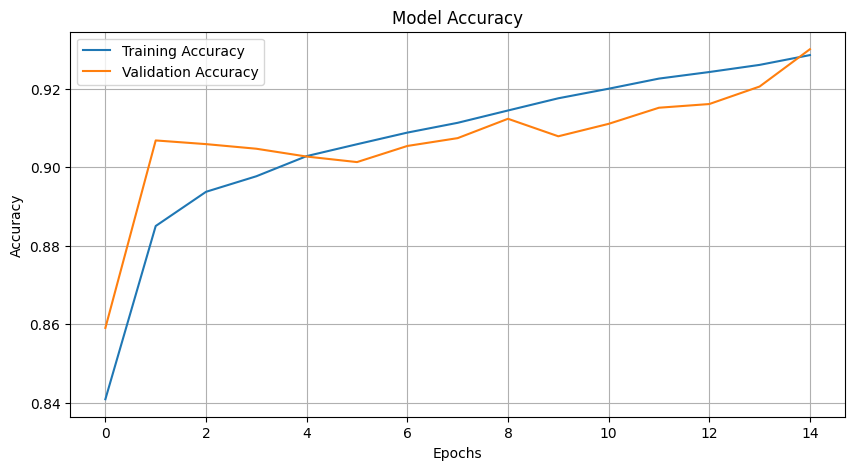

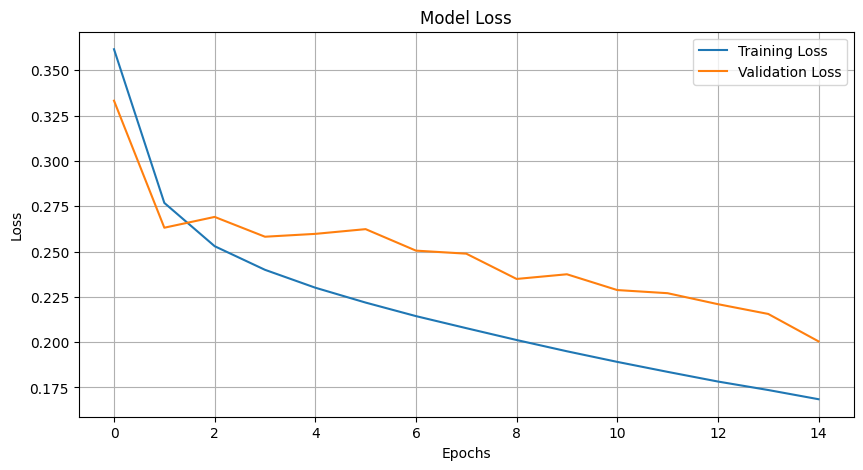

In [42]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

X_train_nn, X_test_nn, Y_train_nn, Y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)


# 1. Set seeds for reproducibility
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Convert Target to Categorical
y_train_nn_resampled_cat = to_categorical(y_train_nn_resampled)
y_nn_test_cat = to_categorical(Y_test_nn)

# 3. Define Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train_nn_resampled.shape[1],)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# 4. Compile the Model
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# 5. Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6. Train the Model
history = nn_model.fit(
    X_train_nn_resampled,
    y_train_nn_resampled_cat,
    epochs=15,  # Slightly more epochs for flexibility
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

# Save the model
model_save_path = 'neural_network_model_alternative.keras'
nn_model.save(model_save_path)

# Reload the model
reloaded_model = load_model(model_save_path)

# 7. Evaluate the Model
test_loss, test_accuracy = nn_model.evaluate(X_test_nn, y_nn_test_cat, verbose=0)
print(f"\nNeural Network Test Accuracy: {test_accuracy:.4f}")

# Additional Runs for Consistency
print("\nEvaluating the reloaded model multiple times:")
for run in range(3):
    eval_loss, eval_accuracy = reloaded_model.evaluate(X_test_nn, y_nn_test_cat, verbose=0)
    print(f"Run {run + 1} - Test Accuracy: {eval_accuracy:.4f}")

# 8. Plot Training History (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

--- Model Comparison ---
Metric         Random Forest  Neural Network 
Accuracy       0.8826         0.8847         
Precision      0.5326         0.5474         
Recall         0.8035         0.6612         
F1-score       0.6406         0.5990         
ROC-AUC        0.9360         0.9207         


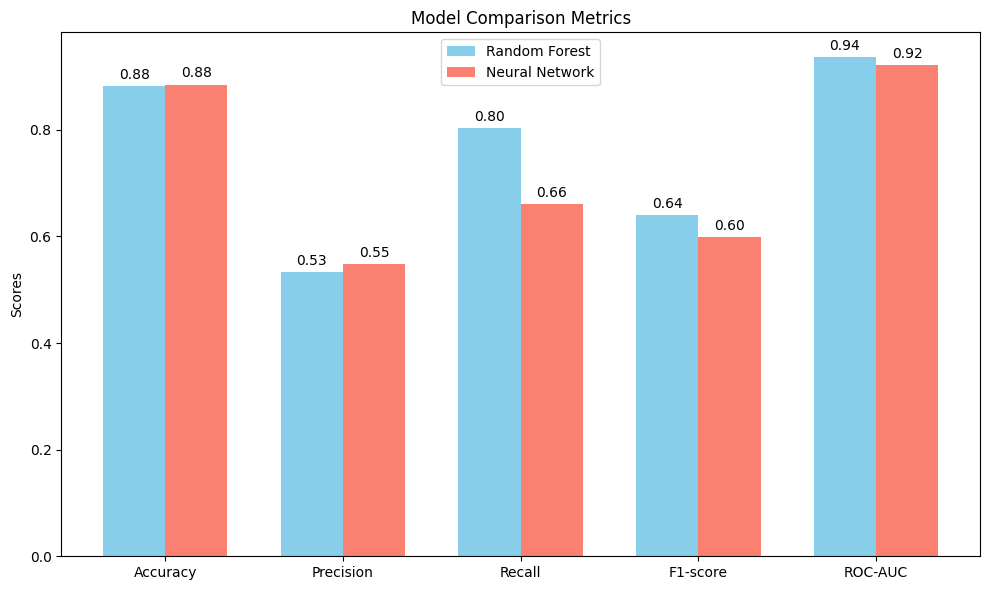

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

y_rf_pred = rf_classifier.predict(X_test_rf)

# Random Forest Evaluation
rf_metrics = {
    "Accuracy": accuracy_score(Y_test_rf, y_rf_pred),
    "Precision": precision_score(Y_test_rf, y_rf_pred),
    "Recall": recall_score(Y_test_rf, y_rf_pred),
    "F1-score": f1_score(Y_test_rf, y_rf_pred),
    "ROC-AUC": roc_auc_score(Y_test_rf, y_rf_proba),
}

# Neural Network Evaluation
y_nn_pred_proba = nn_model.predict(X_test_nn)
y_nn_pred = np.argmax(y_nn_pred_proba, axis=1)

nn_metrics = {
    "Accuracy": accuracy_score(Y_test_nn, y_nn_pred),
    "Precision": precision_score(Y_test_nn, y_nn_pred),
    "Recall": recall_score(Y_test_nn, y_nn_pred),
    "F1-score": f1_score(Y_test_nn, y_nn_pred),
    "ROC-AUC": roc_auc_score(Y_test_nn, y_nn_pred_proba[:, 1]),
}

# Print Metrics
print("\n--- Model Comparison ---")
print(f"{'Metric':<15}{'Random Forest':<15}{'Neural Network':<15}")
for metric in rf_metrics.keys():
    print(f"{metric:<15}{rf_metrics[metric]:<15.4f}{nn_metrics[metric]:<15.4f}")

# Visualization
metric_labels = list(rf_metrics.keys())
rf_scores = list(rf_metrics.values())
nn_scores = list(nn_metrics.values())

# Set up plot
x = np.arange(len(metric_labels))  # Label locations
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rf_bars = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
nn_bars = ax.bar(x + width/2, nn_scores, width, label='Neural Network', color='salmon')

# Add text for labels, title, and axes
ax.set_ylabel('Scores')
ax.set_title('Model Comparison Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metric_labels)
ax.legend()

# Annotate Bars with Scores
for bars in [rf_bars, nn_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

# Adjust layout
fig.tight_layout()
plt.show()
